In [3]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import scipy
import nltk
import logging
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import os






In [4]:
logging.basicConfig(filename='logs/logs.txt',
                    filemode='a',
                    format='%(asctime)s %(message)s',
                    datefmt="%Y-%m-%d %H:%M:%S")

In [5]:
#Logging
logging.warning('Load Dataset')
# Load dataset
df = pd.read_csv("BBC_News_Train.csv")


# Check head
logging.warning('Check Head')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [6]:
# Check tail
logging.warning('Check Tail')
df.tail()

,ArticleId,Text,Category
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech
1489,538,santy worm makes unwelcome visit thousands of ...,tech


In [7]:
# Info
logging.warning('Info')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [8]:
# Describe
logging.warning('Describe')
df.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [9]:
# Checking any null values
logging.warning('Checking Null Values')
df.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [10]:
df.shape

(1490, 3)

In [11]:
# Value counts
logging.warning('Check value counts for Category')
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [12]:
# Preprocessing
logging.warning("-"*100)
logging.warning('Preprocessing')


In [13]:
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [14]:
df_shuffled = df.sample(frac=1,random_state=42)
df_shuffled

,ArticleId,Text,Category
941,2160,wal-mart is sued over rude lyrics the parents ...,entertainment
297,1360,howard taunts blair over splits tony blair s f...,politics
271,302,fox attacks blair s tory lies tony blair lie...,politics
774,864,online commons to spark debate online communit...,tech
420,2184,piero gives rugby perspective bbc sport unveil...,tech
...,...,...,...
1130,193,blair said he would stand down tony blair pr...,politics
1294,111,us trade gap hits record in 2004 the gap betwe...,business
860,833,tories pledge free sports lessons children wou...,politics
1459,2206,dance music not dead says fatboy dj norman coo...,entertainment


In [15]:
# text
text = df_shuffled['Text'].to_numpy()
# Category
category = df_shuffled['Category'].to_numpy()

In [16]:
category

array(['entertainment', 'politics', 'politics', ..., 'politics',
       'entertainment', 'sport'], dtype=object)

In [17]:
logging.warning("Labels One Hot")

In [18]:
# One Hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse=False)
labels_one_hot = one_hot.fit_transform(category.reshape(-1,1))
labels_one_hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [19]:
logging.warning("Labels encoded")

In [20]:
# Labels encode
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(category)
labels_encoded[:20]

array([1, 2, 2, 4, 4, 0, 4, 1, 0, 4, 2, 1, 0, 3, 4, 4, 0, 3, 2, 0])

In [21]:
# Get class names and number of classes from labelencoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['business', 'entertainment', 'politics', 'sport', 'tech'],
       dtype=object))

In [23]:
logging.warning("-"*100)
logging.warning('Splitting')

train_sentences,val_sentences,train_labels,val_labels = train_test_split(text,
                                                                        labels_encoded,
                                                                        random_state=42,
                                                                        test_size=0.2)

In [24]:
logging.warning("-"*100)

In [25]:
train_sentences[:10], train_labels[:10]

(array(['faith schools citizenship warning schools must improve the quality of citizenship lessons - or social cohesion and democracy will suffer  says the education watchdog.  independent faith schools were singled out by ofsted chief  david bell  for not doing enough to promote the  wider tenets of british society . mr bell said muslim  jewish and evangelical christian schools must be  intolerant of intolerance . diversity  certainly must not mean segregated or separate   he said. mr bell s speech called for a much greater effort in all types of schools to teach citizenship - with an accompanying survey showing that young people knew little about politics and had no enthusiasm to find out more.  badly-taught citizenship lessons have previously been criticised by mr bell  and in a speech to the hansard society  he warned that it was failing to pass on an understanding of democracy  public service and shared values. he highlighted his particular concern for citizenship in the growing n

In [26]:
logging.warning("Ragged Tensors for train and val sentences")

In [27]:
train_sentences_r = tf.ragged.constant(train_sentences)
val_sentences_r = tf.ragged.constant(val_sentences)

In [28]:
logging.warning("Create a baseline model")

In [29]:
# Create a baseline model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Set random seed
tf.random.set_seed(52)

# Create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
logging.warning("Evaluate baseline model")
model_0.score(val_sentences, val_labels)

0.9362416107382551

In [31]:
logging.warning("Make predictions")

In [32]:
# Make prediction
baseline_predictions = model_0.predict(val_sentences)
baseline_predictions

array([1, 1, 3, 2, 2, 4, 4, 2, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 2, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 4, 2, 3, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 3, 1, 3, 4, 4, 0, 4, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 4, 0, 1, 4, 0, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 2, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 3, 3, 0, 3, 1, 3, 4, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 2, 0, 2, 4, 2, 0, 0, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 3, 0, 3, 2, 4, 0, 0, 4, 2, 0, 0, 3, 4, 2, 2, 3, 0, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 1, 4, 2, 3, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 0, 0, 2, 2,
       0, 2, 2, 4, 0, 0, 3, 3, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 0, 3, 3, 2, 0, 0, 0, 4, 2])

In [33]:
sample_text = ["Australia won the T20 Worldcup 2021 beating New Zealand by 8 wickets"]
model_0.predict(sample_text)

array([3])

In [34]:
sample_text = ["United States President Joe Biden and China’s President Xi Jinping on Tuesday agreed on the need to “responsibly” manage a competitive relationship but did not arrive at any significant breakthrough on any of the thorny issues that have led to increasingly confrontational ties."]
model_0.predict(sample_text)

array([0])

In [35]:
sample_text = ["YSRCP party leading in the Nellor Elections"]
model_0.predict(sample_text)

array([2])

In [36]:
sample_text = ["""
"Support To Terrorists State Policy": India Slams Pak At UN Over Kashmir

"""]
model_0.predict(sample_text)

array([0])

In [37]:
sample_text = ["Spider-Man No Way Home trailer: Tom Holland’s MCU film is the cinematic event of the year; meet Sinister Six"]
model_0.predict(sample_text)

array([1])

In [38]:
sample_text = ["Google: US technology giant to invest $740m in Australia"]
model_0.predict(sample_text)

array([4])

In [39]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluation_metrics(y_true, y_pred):
    
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.

    Args:
    -----
    y_true = true labels in the form of a 1D array
    y_pred = predicted labels in the form of a 1D array

    Returns a dictionary of accuracy, precision, recall, f1-score.
    
    """
    
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true,y_pred)
    
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results

In [40]:
logging.warning("Evaluation metrics using baseline model ")
baseline_results = evaluation_metrics(val_labels,baseline_predictions)
baseline_results

{'accuracy': 0.9362416107382551,
 'f1': 0.9355904724579887,
 'precision': 0.940138821673615,
 'recall': 0.9362416107382551}

In [41]:
# Preparing our data for deep sequence models

In [42]:
sent_lens = [len(sentence.split()) for sentence in train_sentences ]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

381.6090604026846

In [43]:
logging.warning("-"*100)
logging.warning('Converting Text Into Numbers For Tokenization')
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# max_length
max_length = round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
max_length

382

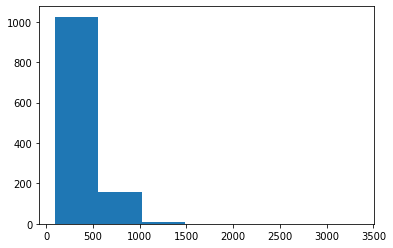

In [44]:
plt.hist(sent_lens, bins=7);

In [45]:
# How long of sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

714

In [46]:
max(sent_lens)

3345

In [47]:
max_tokens = 100000

In [48]:
text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_mode="int",
                                    output_sequence_length=output_seq_len)

In [49]:
text_vectorizer.adapt(train_sentences)


In [50]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 714), dtype=int64, numpy=
array([[    1,     6, 20993,     7,   135,   668,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [51]:
# Choose a random sentence from the training dataset and tokenize it
import random
random_sentence = random.choice(train_sentences_r)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
b'hobbit picture  four years away  lord of the rings director peter jackson has said that it will be up to four years before he starts work on a film version of the hobbit.  the oscar winner said on a visit to sydney there was a  desire  to make it  but not before lengthy negotiations.  i think it s gonna be a lot of lawyers sitting in a room trying to thrash out a deal before it will ever happen   said the new zealander. the rights to jrr tolkien s book are split between two major film studios. jackson  who is currently filming a remake of hollywood classic king kong  said he thought that the sale of mgm studios to the sony corporation would cast further uncertainty on the project. the 43-year-old was in the australian city to visit a lord of the rings exhibition  which has attracted 140 000 visitors since it opened in december.  the film-maker recently sued film company new line cinema for undisclosed damages over alleged withheld profits and lost revenue from the firs

<tf.Tensor: shape=(1, 714), dtype=int64, numpy=
array([[13112,  1095,   206,    81,   301,   444,     4,     2,  3212,
          200,  1048,  2240,    20,    14,    11,    12,    23,    17,
           48,     3,   206,    81,    92,    16,  2561,   143,    13,
            6,    82,   565,     4,     2, 13112,     2,   772,   806,
           14,    13,     6,  1176,     3,  1511,    52,    15,     6,
         1846,     3,    88,    12,    25,    29,    92,  4399,  2140,
           28,   171,    12,     8,  7306,    17,     6,   342,     4,
         1988,  4651,     7,     6,  1707,   616,     3, 15962,    56,
            6,   212,    92,    12,    23,   449,  1344,    14,     2,
           47,  7730,     2,   424,     3, 12871,  7841,     8,   529,
           26,  2450,   157,    67,   395,    82,  1592,  2240,    45,
           10,   420,  6454,     6,  4695,     4,   850,  2519,  1206,
         2396,    14,    16,   405,    11,     2,   356,     4,  7128,
         1592,     3,     2, 

In [52]:
vocab = text_vectorizer.get_vocabulary()
len(vocab)

24905

In [53]:
logging.warning('Embedding Layer')

In [54]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=len(vocab), # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             mask_zero=False,
                             name="embedding_1") 

embedding

In [55]:
# Get a random sentence from training set
import random
random_sentence = random.choice(train_sentences_r)
print(f"Original text:\n{random_sentence}\
      \n\nTokenization : \n{text_vectorizer([random_sentence])}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
b'europe backs digital tv lifestyle how people receive their digital entertainment in the future could change  following the launch of an ambitious european project.  in nice last week  the european commission announced its networked & electronic media (nem) initiative. its broad scope stretches from the way media is created  through each of the stages of its distribution  to its playback. the commission wants people to be able to locate the content they desire and have it delivered seamlessly  when on the move  at home or at work  no matter who supplies the devices  network  content  or content protection scheme. more than 120 experts were in nice to share the vision of interconnected future and hear pledges of support from companies such as nokia  intel  philips  alcatel  france telecom  thomson and telefonica. it might initially appear to be surprising that companies in direct competition are keen to work together. but again and again  speakers stated they could not s

<tf.Tensor: shape=(1, 714, 128), dtype=float32, numpy=
array([[[-0.0329975 ,  0.00978688, -0.04553537, ...,  0.04971104,
          0.0137558 ,  0.04985643],
        [ 0.03555218, -0.02307458,  0.0225423 , ...,  0.00768205,
         -0.04725116,  0.01436228],
        [-0.02347752, -0.01775049,  0.00492607, ..., -0.03233278,
          0.04258275, -0.03723961],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [56]:
logging.warning('Create Tensorboard Callback')
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    """
    Creates a TensorBoard callback instand to store log files.
    
    Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
    
    Args:
      dir_name: target directory to store TensorBoard log files
      experiment_name: name of experiment directory (e.g. efficientnet_model_1)
    
    """
    
    log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir = log_dir
    )
    
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [57]:
logging.warning("Early Stopping Callbacks")
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=3)

In [58]:
logging.warning("-"*100)
logging.warning("Simple Dense Model")

In [59]:
logging.warning("Create Dataset using `tf.data.Dataset` for training and validation")

In [60]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences_r, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences_r, val_labels))

train_dataset, val_dataset

(<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 <TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>)

In [61]:
logging.warning("Prefetch batch using `tf.data.AUTOTUNE`")
train_dataset = train_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset =   val_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

train_dataset, val_dataset

(<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>,
 <PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>)

In [62]:
# Build model with the Functional API
from tensorflow.keras import layers
from tensorflow.keras.layers import  Dense, GlobalAveragePooling1D

# Set random seed
tf.random.set_seed(452)

# Construct model
inputs = layers.Input(shape=(1,), dtype=tf.string,ragged=True) 
text_vectorization_layer = text_vectorizer(inputs) 
embedding_layer = embedding(text_vectorization_layer) 
global_average_pooling_layer = layers.GlobalAveragePooling1D()(embedding_layer) 
outputs = layers.Dense(num_classes, activation="softmax")(global_average_pooling_layer) 
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 714)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 3,188,485
Trainable params: 3,188,485
N

In [63]:
logging.warning("Fit and train model")

In [64]:
# Fit
history_1 = model_1.fit(train_dataset,
                       epochs=5,
                       validation_data=val_dataset,
                       callbacks=[early_stopping_callback,
                                 create_tensorboard_callback(dir_name='Model_logs',
                                                            experiment_name='simple_dense_model')])

Saving TensorBoard log files to: Model_logs/simple_dense_model/20211129-014659
Epoch 1/5
38/38 [==============================] - 3s 21ms/step - loss: 1.5906 - accuracy: 0.3909 - val_loss: 1.5601 - val_accuracy: 0.4631
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 1.5376 - accuracy: 0.4807 - val_loss: 1.4977 - val_accuracy: 0.5403
Epoch 3/5
38/38 [==============================] - 1s 15ms/step - loss: 1.4691 - accuracy: 0.5386 - val_loss: 1.4164 - val_accuracy: 0.6577
Epoch 4/5
38/38 [==============================] - 1s 15ms/step - loss: 1.3784 - accuracy: 0.6208 - val_loss: 1.3188 - val_accuracy: 0.7047
Epoch 5/5
38/38 [==============================] - 1s 15ms/step - loss: 1.2688 - accuracy: 0.6946 - val_loss: 1.2117 - val_accuracy: 0.7383


In [65]:
logging.warning("Evaluate model_1 on val_dataset")
model_1.evaluate(val_dataset)

10/10 [==============================] - 0s 6ms/step - loss: 1.2117 - accuracy: 0.7383


[1.2117449045181274, 0.7382550239562988]

In [66]:
logging.warning("Make prediction using simple dense model")

In [67]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs


array([[0.23281938, 0.29177472, 0.11473512, 0.2842984 , 0.07637245],
       [0.21276127, 0.33686626, 0.12615626, 0.23565061, 0.08856563],
       [0.23632078, 0.23289973, 0.11154409, 0.35088748, 0.0683479 ],
       ...,
       [0.32061094, 0.15247124, 0.17423537, 0.18107475, 0.17160766],
       [0.14969335, 0.07568392, 0.21736792, 0.0858835 , 0.47137126],
       [0.17812762, 0.14570095, 0.33635226, 0.18901455, 0.15080464]],
      dtype=float32)

In [68]:
model_1_preds = tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 1, 2, 3, 0, 3, 3, 0,
       0, 4, 3, 3, 3, 2, 3, 3, 2, 3, 3, 0, 0, 0, 2, 0, 0, 3, 3, 3, 4, 3,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 0, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 0, 2, 3, 0, 3, 0, 3, 2, 0, 0, 3, 3, 0, 0,
       0, 4, 3, 1, 3, 4, 4, 0, 3, 3, 2, 2, 0, 2, 3, 3, 1, 0, 2, 4, 3, 0,
       3, 2, 3, 3, 0, 0, 3, 4, 0, 1, 4, 0, 0, 3, 0, 4, 3, 2, 3, 0, 2, 3,
       3, 0, 3, 4, 4, 3, 0, 0, 3, 3, 4, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3,
       1, 3, 0, 3, 2, 3, 3, 2, 3, 3, 0, 3, 4, 2, 0, 4, 2, 0, 3, 2, 4, 0,
       0, 4, 0, 0, 4, 4, 4, 3, 2, 3, 0, 4, 4, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       2, 4, 0, 3, 3, 4, 0, 0, 4, 3, 0, 0, 3, 4, 2, 2, 3, 0, 0, 3, 4, 4,
       0, 3, 3, 4, 3, 0, 3, 3, 2, 0, 4, 3, 2, 4, 4, 2, 4, 3, 2, 3, 0, 0,
       3, 4, 3, 0, 4, 0, 3, 3, 4, 1, 4, 3, 3, 3, 4, 3, 0, 4, 0, 0, 4, 0,
       0, 2, 2, 4, 0, 0, 3, 2, 4, 0, 3, 3, 0, 3, 0, 0, 2, 0, 0, 2, 0, 3,
     

In [69]:
logging.warning("Evaluate using simple dense model")

In [70]:
# Calculate model_1 metrics
model_1_results = evaluation_metrics(y_true=val_labels, 
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 0.738255033557047,
 'f1': 0.7031040637698016,
 'precision': 0.803971563751046,
 'recall': 0.738255033557047}

In [71]:
logging.warning("-"*100)
logging.warning("Model 2 Conv1D")

In [72]:
# Set random seed
tf.random.set_seed(42)


# Create Conv1D model
inputs = layers.Input(shape=(1,),dtype='string',ragged=True)
text_vectorization_layer = text_vectorizer(inputs)
embedding_layer = embedding(text_vectorization_layer)
x = layers.Conv1D(64, 5, padding='same', activation='relu')(embedding_layer)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model_2 = tf.keras.Model(inputs,outputs,name='model_2_Conv1D')

# Compile
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

# summary 
model_2.summary()

Model: "model_2_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 714)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 conv1d (Conv1D)             (None, 714, 64)           41024     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)              

In [73]:
logging.warning("Fit and train model")
history_2 = model_2.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                 create_tensorboard_callback(dir_name='Model_logs',
                                                            experiment_name='model_2_Conv1d')])

Saving TensorBoard log files to: Model_logs/model_2_Conv1d/20211129-014706
Epoch 1/5
38/38 [==============================] - 9s 29ms/step - loss: 1.2857 - accuracy: 0.7064 - val_loss: 1.0097 - val_accuracy: 0.7349
Epoch 2/5
38/38 [==============================] - 1s 21ms/step - loss: 0.7457 - accuracy: 0.8591 - val_loss: 0.6198 - val_accuracy: 0.8926
Epoch 3/5
38/38 [==============================] - 1s 20ms/step - loss: 0.3980 - accuracy: 0.9480 - val_loss: 0.3816 - val_accuracy: 0.9262
Epoch 4/5
38/38 [==============================] - 1s 21ms/step - loss: 0.2078 - accuracy: 0.9815 - val_loss: 0.2540 - val_accuracy: 0.9497
Epoch 5/5
38/38 [==============================] - 1s 20ms/step - loss: 0.1168 - accuracy: 0.9916 - val_loss: 0.1903 - val_accuracy: 0.9564


In [74]:
logging.warning("Evaluate using model_2 on val_dataset")
model_2.evaluate(val_dataset)

10/10 [==============================] - 0s 9ms/step - loss: 0.1903 - accuracy: 0.9564


[0.19032137095928192, 0.9563758373260498]

In [75]:
logging.warning("Make prediction with Conv1D model")

In [76]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_pred_probs

array([[5.9421854e-03, 9.5494390e-01, 9.2830276e-03, 2.0698741e-02,
        9.1321506e-03],
       [1.4362318e-04, 9.9755365e-01, 8.0331881e-04, 1.9062306e-04,
        1.3088663e-03],
       [2.0791594e-02, 7.3766753e-02, 2.6469171e-02, 8.7058860e-01,
        8.3838655e-03],
       ...,
       [9.8919642e-01, 5.9858622e-04, 3.9440948e-03, 1.3854050e-04,
        6.1223893e-03],
       [9.7906857e-04, 7.0145726e-04, 2.5561525e-04, 8.1521449e-07,
        9.9806303e-01],
       [2.1310776e-04, 6.3759013e-04, 9.9895418e-01, 1.0040476e-04,
        9.4656309e-05]], dtype=float32)

In [77]:
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 2, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 2, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 4, 2, 1, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 1, 1, 3, 4, 4, 0, 4, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 0, 0, 1, 4, 0, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 2, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 1, 3, 0, 0, 1, 3, 4, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 2, 4, 2, 0, 4, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 3, 0, 3, 2, 4, 0, 0, 4, 1, 0, 0, 3, 4, 2, 2, 3, 0, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 4, 4, 2, 4, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 0, 0, 2, 2,
       0, 2, 2, 4, 0, 0, 3, 2, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 0, 2, 0, 3,
     

In [78]:
logging.warning("Evaluation metrics using Conv1D")


In [79]:
model_2_results = evaluation_metrics(val_labels,
                                     model_2_preds)
model_2_results

{'accuracy': 0.9563758389261745,
 'f1': 0.9560226495196614,
 'precision': 0.9571000659771737,
 'recall': 0.9563758389261745}

In [80]:
logging.warning("-"*100)
logging.warning("Model_3 LSTM")

In [81]:
# Set random seed
tf.random.set_seed(42)


# Build LSTM model
inputs = tf.keras.Input(shape=(1,),dtype=tf.string,ragged=True)
text_vectorization_layer = text_vectorizer(inputs)
embedding_layer = embedding(text_vectorization_layer)
x = layers.LSTM(64,return_sequences=True)(embedding_layer)
x = layers.Dense(128, activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_3 = tf.keras.Model(inputs, outputs,name='Model_3_LSTM')

# Compile
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Summary
model_3.summary()

Model: "Model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 714)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 lstm (LSTM)                 (None, 714, 64)           49408     
                                                                 
 dense_2 (Dense)             (None, 714, 128)          8320      
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                             

In [82]:
logging.warning("Fit and train model")
history_3 = model_3.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                   create_tensorboard_callback(dir_name='Model_logs',
                                                               experiment_name='Model_3_LSTM')])

Saving TensorBoard log files to: Model_logs/Model_3_LSTM/20211129-014722
Epoch 1/5
38/38 [==============================] - 9s 151ms/step - loss: 1.1736 - accuracy: 0.6124 - val_loss: 0.6856 - val_accuracy: 0.8389
Epoch 2/5
38/38 [==============================] - 5s 131ms/step - loss: 0.3258 - accuracy: 0.9530 - val_loss: 0.1805 - val_accuracy: 0.9631
Epoch 3/5
38/38 [==============================] - 5s 131ms/step - loss: 0.0935 - accuracy: 0.9849 - val_loss: 0.3174 - val_accuracy: 0.9295
Epoch 4/5
38/38 [==============================] - 5s 129ms/step - loss: 0.0964 - accuracy: 0.9841 - val_loss: 0.1397 - val_accuracy: 0.9698
Epoch 5/5
38/38 [==============================] - 5s 132ms/step - loss: 0.0435 - accuracy: 0.9933 - val_loss: 0.1147 - val_accuracy: 0.9698


In [83]:
logging.warning("Evaluate model_3 on val_dataset")
model_3.evaluate(val_dataset)

10/10 [==============================] - 0s 44ms/step - loss: 0.1147 - accuracy: 0.9698


[0.1146596223115921, 0.9697986841201782]

In [84]:
logging.warning("Make prediction with LSTM model")

In [85]:
model_3_pred_probs = model_3.predict(val_dataset)
model_3_pred_probs

array([[1.2962554e-03, 9.8498487e-01, 4.1194535e-03, 2.5364480e-03,
        7.0629213e-03],
       [1.3859179e-04, 9.9489957e-01, 9.5950527e-04, 2.9727432e-04,
        3.7050180e-03],
       [2.2049330e-02, 7.9811849e-03, 3.5909445e-03, 9.6519876e-01,
        1.1797830e-03],
       ...,
       [9.9682498e-01, 3.9944105e-05, 2.4503411e-03, 1.4463479e-04,
        5.4009265e-04],
       [4.8254662e-07, 9.5581472e-06, 6.8836084e-06, 8.9023979e-09,
        9.9998307e-01],
       [2.2609273e-04, 1.9824055e-04, 9.9949014e-01, 1.9371607e-06,
        8.3645216e-05]], dtype=float32)

In [86]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 2, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 2, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 2, 2, 1, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 1, 1, 3, 4, 4, 0, 4, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 4, 0, 1, 4, 4, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 2, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 3, 3, 0, 0, 1, 3, 4, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 2, 4, 2, 0, 4, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 4, 2, 0, 1, 0, 0, 0,
       2, 3, 0, 3, 2, 4, 0, 0, 4, 1, 0, 0, 3, 4, 2, 2, 3, 4, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 1, 4, 2, 1, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 0, 0, 1, 2,
       0, 2, 2, 4, 0, 0, 3, 1, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 2, 2, 0, 3,
     

In [87]:
logging.warning("Evaluation metrics using LSTM")

In [88]:
model_3_results = evaluation_metrics(val_labels,
                                     model_3_preds)
model_3_results

{'accuracy': 0.9697986577181208,
 'f1': 0.9698123265529475,
 'precision': 0.9701218902166394,
 'recall': 0.9697986577181208}

In [89]:
logging.warning("-"*100)
logging.warning("Model 4 GRU")


In [90]:
#  Set random seed
tf.random.set_seed(42)



# Build model
inputs = tf.keras.Input(shape=(1,),dtype=tf.string,ragged=True)
text_vectorization_layer = text_vectorizer(inputs)
embedding_layer = embedding(text_vectorization_layer)
x = layers.GRU(64, return_sequences=True)(embedding_layer)
x = layers.Dense(128,activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_4 = tf.keras.Model(inputs,outputs,name='model_4_GRU')

# Compile
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Summary
model_4.summary()

Model: "model_4_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 714)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 gru (GRU)                   (None, 714, 64)           37248     
                                                                 
 dense_4 (Dense)             (None, 714, 128)          8320      
                                                                 
 global_average_pooling1d_3   (None, 128)              0         
 (GlobalAveragePooling1D)                              

In [91]:
logging.warning("Fit and train model")
history_4 = model_4.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                   create_tensorboard_callback('Model_logs',
                                                               'Model_4_GRU')])

Saving TensorBoard log files to: Model_logs/Model_4_GRU/20211129-014756
Epoch 1/5
38/38 [==============================] - 8s 141ms/step - loss: 1.2958 - accuracy: 0.5923 - val_loss: 0.7897 - val_accuracy: 0.7752
Epoch 2/5
38/38 [==============================] - 5s 126ms/step - loss: 0.3655 - accuracy: 0.9220 - val_loss: 0.3935 - val_accuracy: 0.8893
Epoch 3/5
38/38 [==============================] - 5s 127ms/step - loss: 0.0833 - accuracy: 0.9916 - val_loss: 0.1815 - val_accuracy: 0.9430
Epoch 4/5
38/38 [==============================] - 5s 127ms/step - loss: 0.0325 - accuracy: 0.9941 - val_loss: 0.2724 - val_accuracy: 0.9329
Epoch 5/5
38/38 [==============================] - 5s 127ms/step - loss: 0.0162 - accuracy: 0.9975 - val_loss: 0.2489 - val_accuracy: 0.9430


In [92]:
logging.warning("Evaluate Model 4 on val_dataset")
model_4.evaluate(val_dataset)

10/10 [==============================] - 0s 45ms/step - loss: 0.2489 - accuracy: 0.9430


[0.24887417256832123, 0.9429529905319214]

In [93]:
logging.warning("Make Prediction using model_4 on val_dataset")


In [94]:
model_4_preds = tf.argmax(model_4.predict(val_dataset),axis=1)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 1, 3, 2, 2, 4, 4, 2, 3, 3])>

In [95]:
logging.warning("Evaluate metrics ")
model_4_results = evaluation_metrics(val_labels,
                                     model_4_preds)
model_4_results

{'accuracy': 0.9429530201342282,
 'f1': 0.942476194749141,
 'precision': 0.9448145242295372,
 'recall': 0.9429530201342282}

In [96]:
logging.warning("-"*100)
logging.warning("Model 5 Bidirectional LSTM")


In [97]:
# Set random seed
tf.random.set_seed(42)



# Build model
inputs = tf.keras.Input(shape=(1,),dtype=tf.string,ragged=True)
text_vectorization_layer = text_vectorizer(inputs)
embedding_layer = embedding(text_vectorization_layer)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(embedding_layer)
x = layers.Bidirectional(layers.LSTM(128,return_sequences=True))(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes,activation='softmax')(x)
model_5 = tf.keras.Model(inputs,outputs,name='model_5')

# Compile
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Summary
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 714)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 714, 128)          3187840   
                                                                 
 bidirectional (Bidirectiona  (None, 714, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 714, 256)         263168    
 nal)                                                            
                                                           

In [98]:
logging.warning("Fit and train model")
history_5 = model_5.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                   create_tensorboard_callback('Model_logs',
                                                               'Model_5_Bidirectional(LSTM)')])

Saving TensorBoard log files to: Model_logs/Model_5_Bidirectional(LSTM)/20211129-014826
Epoch 1/5
38/38 [==============================] - 26s 488ms/step - loss: 0.5691 - accuracy: 0.8557 - val_loss: 0.3301 - val_accuracy: 0.9027
Epoch 2/5
38/38 [==============================] - 17s 437ms/step - loss: 0.1206 - accuracy: 0.9681 - val_loss: 0.1036 - val_accuracy: 0.9664
Epoch 3/5
38/38 [==============================] - 17s 438ms/step - loss: 0.0138 - accuracy: 0.9983 - val_loss: 0.1464 - val_accuracy: 0.9664
Epoch 4/5
38/38 [==============================] - 17s 437ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.1250 - val_accuracy: 0.9698
Epoch 5/5
38/38 [==============================] - 17s 441ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.1131 - val_accuracy: 0.9765


In [99]:
logging.warning("Evaluate model_5 on val_dataset")
model_5.evaluate(val_dataset)

10/10 [==============================] - 1s 149ms/step - loss: 0.1131 - accuracy: 0.9765


[0.11305049806833267, 0.9765100479125977]

In [100]:
logging.warning("Make prediction using Model_5 on val_dataset")
model_5_preds = tf.argmax(model_5.predict(val_dataset),axis=1)
model_5_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 1, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 0, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 4, 2, 1, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 1, 1, 3, 4, 4, 0, 4, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 0, 0, 1, 4, 0, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 0, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 1, 3, 0, 0, 1, 3, 4, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 2, 4, 2, 0, 4, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 4, 2, 0, 1, 0, 0, 0,
       2, 3, 0, 3, 2, 4, 0, 0, 4, 1, 0, 0, 3, 4, 2, 2, 3, 4, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 1, 4, 2, 1, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 0, 0, 1, 2,
       0, 2, 2, 4, 0, 0, 3, 1, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 0, 2, 0, 3,
     

In [101]:
logging.warning("Evaluation Metrics")
model_5_results = evaluation_metrics(val_labels,
                                     model_5_preds)
model_5_results

{'accuracy': 0.9765100671140939,
 'f1': 0.9765513980756624,
 'precision': 0.9777529207059407,
 'recall': 0.9765100671140939}

In [102]:
logging.warning("-"*100)
logging.warning("Model 6 using Transfer Learning")

In [103]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 40.4 MB/s 
     |████████████████████████████████| 3.3 MB 25.4 MB/s 
     |████████████████████████████████| 59 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 25.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [104]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 5.2 MB/s 


In [105]:
# Load libraries
import tensorflow_text as text
import tensorflow_hub as hub 

preprocessing_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
                                     trainable=False,name='preprocessing_layer')

bert_layer = hub.KerasLayer('https://tfhub.dev/google/experts/bert/pubmed/2',
                            trainable=False,
                            name='bert_model_layer')
# set random seed
tf.random.set_seed(42)

# Creating a model out of it 
input = layers.Input(shape = [] , dtype = tf.string ,ragged=True, name = 'input_sentences')
bert_inputs = preprocessing_layer(input)
bert_embedding =bert_layer(bert_inputs)
print(f'bert embedding shape: {bert_embedding}')
x = layers.Dense(128 , activation = 'relu')(bert_embedding['pooled_output'])
x = layers.Dropout(0.5)(x)
output = layers.Dense(len(class_names) , activation= 'softmax')(x)

# Packing into a model
model_6 = tf.keras.Model(input , output)
model_6.summary()

bert embedding shape: {'sequence_output': <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, 'encoder_outputs': [<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert_model_layer')>, <KerasTensor: shape=(None, 1

In [106]:
# Compile
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

logging.warning("Fit and train")
history_6 = model_6.fit(train_dataset,
                        epochs=5,
                        validation_data=val_dataset,
                        callbacks=[early_stopping_callback,
                                   create_tensorboard_callback('Model_logs',
                                                               'Model_6_Bert')])

Saving TensorBoard log files to: Model_logs/Model_6_Bert/20211129-015051
Epoch 1/5
38/38 [==============================] - 41s 790ms/step - loss: 1.5812 - accuracy: 0.3263 - val_loss: 1.1949 - val_accuracy: 0.6309
Epoch 2/5
38/38 [==============================] - 34s 895ms/step - loss: 1.1142 - accuracy: 0.5705 - val_loss: 0.8930 - val_accuracy: 0.7383
Epoch 3/5
38/38 [==============================] - 30s 783ms/step - loss: 0.9271 - accuracy: 0.6644 - val_loss: 0.7665 - val_accuracy: 0.7752
Epoch 4/5
38/38 [==============================] - 29s 778ms/step - loss: 0.7762 - accuracy: 0.7299 - val_loss: 0.6632 - val_accuracy: 0.7953
Epoch 5/5
38/38 [==============================] - 29s 776ms/step - loss: 0.6903 - accuracy: 0.7693 - val_loss: 0.6278 - val_accuracy: 0.8087


In [107]:
logging.warning("Evaluate model_6 on val_dataset")
model_6.evaluate(val_dataset)

10/10 [==============================] - 6s 588ms/step - loss: 0.6278 - accuracy: 0.8087


[0.6278420090675354, 0.8087248206138611]

In [108]:
logging.warning("Make Prediction using model_6 on val_dataset")
model_6_preds = tf.argmax(model_6.predict(val_dataset),axis=1)
model_6_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 0, 3, 1, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 2, 3, 3, 2, 3, 3, 0, 0, 0, 2, 0, 0, 3, 1, 4, 4, 1,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 4, 3, 0, 3, 4, 2, 3, 3, 2, 3, 4, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 2, 2, 3, 0, 0, 0, 3, 2, 2, 4, 1, 3, 0, 0,
       0, 1, 4, 1, 3, 4, 4, 2, 4, 3, 2, 2, 2, 0, 3, 4, 1, 4, 2, 1, 1, 4,
       3, 2, 1, 3, 4, 0, 1, 4, 2, 1, 4, 0, 0, 1, 4, 4, 3, 2, 3, 0, 2, 3,
       3, 0, 2, 3, 4, 3, 0, 0, 3, 3, 0, 3, 4, 1, 1, 0, 0, 4, 3, 0, 3, 3,
       1, 1, 0, 1, 2, 1, 3, 2, 3, 2, 0, 2, 4, 2, 0, 1, 2, 0, 2, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 3, 3, 4, 4, 4, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       2, 3, 0, 3, 2, 4, 0, 2, 4, 1, 0, 2, 3, 0, 2, 2, 3, 0, 0, 3, 4, 4,
       0, 3, 1, 4, 1, 2, 3, 2, 2, 0, 4, 1, 2, 4, 4, 2, 3, 1, 2, 2, 0, 0,
       0, 4, 3, 0, 4, 4, 3, 3, 3, 1, 4, 0, 1, 1, 0, 3, 0, 4, 0, 0, 2, 2,
       0, 2, 2, 4, 0, 0, 3, 3, 4, 0, 3, 3, 4, 3, 0, 0, 2, 0, 0, 2, 0, 3,
     

In [109]:
# Evaluation metrics
logging.warning("Evaluation metrics")
model_6_results = evaluation_metrics(val_labels,
                                     model_6_preds)
model_6_results

{'accuracy': 0.8087248322147651,
 'f1': 0.8065580510398471,
 'precision': 0.8117052929265929,
 'recall': 0.8087248322147651}

In [110]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"Baseline": baseline_results,
                                  "Simple_dense": model_1_results,
                                  "Conv1D": model_2_results,
                                  "LSTM": model_3_results,
                                  "GRU": model_4_results,
                                  "Bidirectional": model_5_results,
                                  "BERT": model_6_results,
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
Baseline,0.936242,0.940139,0.936242,0.935590
Simple_dense,0.738255,0.803972,0.738255,0.703104
Conv1D,0.956376,0.957100,0.956376,0.956023
LSTM,0.969799,0.970122,0.969799,0.969812
GRU,0.942953,0.944815,0.942953,0.942476
Bidirectional,0.976510,0.977753,0.976510,0.976551
BERT,0.808725,0.811705,0.808725,0.806558


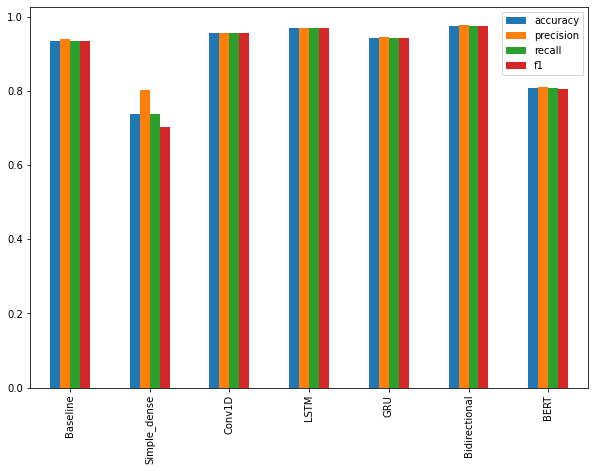

In [111]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

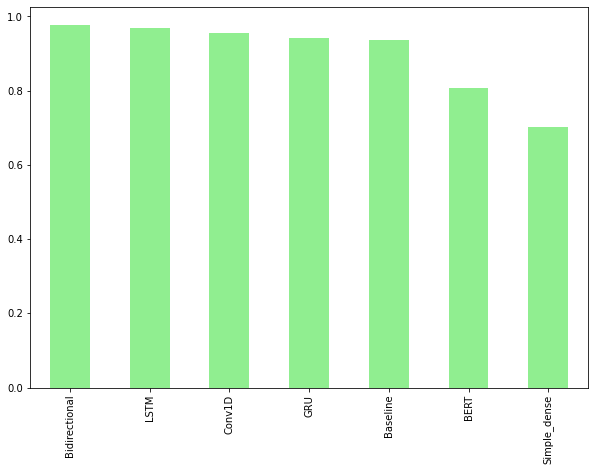

In [112]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7),color='lightgreen');

In [113]:
logging.warning("-"*100)

In [114]:
logging.warning("Save best performing model")

In [123]:
import pickle
pickle.dump(model_5, open('bidirectional.pkl','wb'))

# load_model
load_pickle_model = pickle.load(open('bidirectional.pkl','rb'))

INFO:tensorflow:Assets written to: ram://6d271296-9318-42d4-a34c-5e5f7ab32cda/assets


In [124]:
logging.warning('Load saved model and checking summary')

In [125]:
load_pickle_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         3187840   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        263168    
 nal)                                                            
                                                           

In [126]:
logging.warning('Evaluate saved model on val_dataset')

In [127]:
load_pickle_model.evaluate(val_dataset)

10/10 [==============================] - 24s 2s/step - loss: 0.1393 - accuracy: 0.9799


[0.1393091082572937, 0.9798657894134521]

In [128]:
logging.warning('Make prediction')

In [129]:
# make prediction using saved_model
pred_proba = load_pickle_model.predict(val_dataset)
preds = tf.argmax(pred_proba, axis=1)
preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 1, 3, 2, 2, 4, 4, 1, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 0,
       0, 4, 3, 3, 1, 0, 3, 3, 2, 3, 1, 0, 0, 0, 2, 0, 0, 1, 3, 1, 4, 4,
       4, 3, 3, 0, 3, 3, 0, 0, 0, 1, 3, 0, 3, 4, 2, 3, 3, 2, 0, 0, 4, 2,
       4, 3, 2, 0, 2, 4, 3, 3, 4, 2, 1, 0, 1, 0, 3, 2, 0, 4, 2, 3, 0, 0,
       0, 1, 4, 1, 3, 4, 4, 0, 4, 3, 2, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 4,
       3, 2, 3, 3, 0, 0, 1, 4, 0, 1, 4, 0, 0, 1, 1, 4, 3, 2, 3, 0, 2, 3,
       3, 4, 2, 0, 4, 3, 4, 4, 3, 3, 4, 1, 4, 1, 3, 0, 0, 1, 3, 4, 3, 3,
       1, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 2, 4, 2, 0, 4, 2, 0, 3, 2, 4, 1,
       0, 4, 0, 0, 4, 4, 4, 2, 2, 3, 4, 4, 4, 0, 1, 4, 2, 0, 1, 0, 0, 0,
       2, 3, 0, 3, 2, 4, 0, 0, 4, 1, 0, 0, 3, 4, 2, 2, 3, 4, 0, 1, 4, 4,
       0, 3, 1, 4, 1, 0, 3, 2, 2, 0, 4, 1, 2, 1, 4, 2, 1, 1, 2, 3, 0, 0,
       3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 1, 1, 4, 3, 0, 4, 0, 0, 1, 2,
       0, 2, 2, 4, 0, 0, 3, 1, 4, 2, 3, 3, 4, 3, 0, 0, 2, 0, 0, 2, 0, 3,
     

In [130]:
logging.warning('Check the model_logs on tensorboard')

In [131]:
# !tensorboard dev upload --logdir Model_logs \
#   --name "News Classification Models" \
#   --description "Training results for different models" \
#   --one_shot

In [132]:
# !tensorboard dev list

In [133]:
logging.warning("-"*100)
logging.warning('End')